# Movie Recommendation Project
## Version: 1.0.0
## Author: Wontaek Kim

1. Demographic Filtering
2. Content Based Filtering
3. Collaborative Filtering

## 1. Demographic Filtering

In [1]:
# imports
import pandas as pd
import numpy as np

df_credits = pd.read_csv('tmdb_5000_credits.csv')
df_movies = pd.read_csv('tmdb_5000_movies.csv')

In [2]:
# find out the overall datasets 
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
df_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [4]:
# find out the shapes of the two datasets
df_credits.shape, df_movies.shape

((4803, 4), (4803, 20))

In [5]:
# find out wheter the 'title' columns of two datdasets are equal
df_credits['title'].equals(df_movies['title'])
# if true, their datasets of 'title' are equal
# else not.

True

In [6]:
# Now, I want to combine the two datasets in one dataset by deleting the duplicated column ('title') and append the cast and crew.

# Let's covert 'the movie_id' in df_credits to 'id'
df_credits.columns = ['id', 'title', 'cast', 'crew']
# delete the duplicated column, 'title'
df_credits[['id', 'cast', 'crew']]
# combine by using merge method
df_movies = df_movies.merge(df_credits[['id', 'cast', 'crew']], on='id')
df_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


Let's calculating the reliability of the movie.

Weighted Rating(WR) = $ (\frac{v}{v+m} R) + (\frac{m}{v+m} C) $

where, 
- v is the number of votes for the movie
- m is the minimum votes required to be listed in the chart
- R is the average rating of the movie
- C is the mean vote across the whole report

In [7]:
# pick the mean of the vote_average
C = df_movies['vote_average'].mean()
# pick the top 10% of the movie with vote_count
m = df_movies['vote_count'].quantile(0.9)

In [8]:
# copy the datasets with qulified for m (>=m)
quan_movies = df_movies.copy().loc[df_movies['vote_count'] >= m]
# sort by the vote_count
quan_movies['vote_count'].sort_values()

2585     1840
195      1851
2454     1859
597      1862
1405     1864
        ...  
788     10995
16      11776
0       11800
65      12002
96      13752
Name: vote_count, Length: 481, dtype: int64

we can see that minimum vote_count is 1840 and maximum is 13752.

In [9]:
# function Weighted Rating
def wr(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v / (v+m) * R) + (m / (m + v) * C)

In [10]:
# Then, I made the new comlumn "score" for each movie.
quan_movies['score'] = quan_movies.apply(wr, axis=1) # with each row
quan_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396


Now, I will print out the title, vote_average, and vote_count of the movie based on the new 'score' I made.

In [11]:
quan_movies =   quan_movies.sort_values('score', ascending=False)
quan_movies[['title', 'vote_count', 'vote_average', 'score']].head(20)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

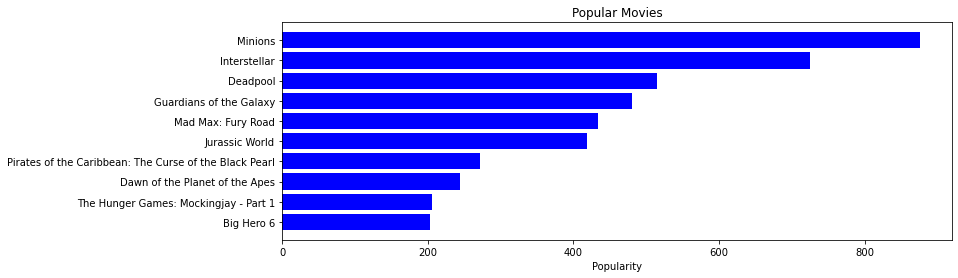

In [12]:
# compare between the popularity in the original datsets and "score" I implemented

pop = df_movies.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10), pop['popularity'].head(10), align='center',
        color='blue')

plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

There are huge difference between the popularity and the order based on the 'score' I have implemented.
This is because of the factors that popularity is based on.

- Number of votes for the day
- Number of views for the day
- Number of users who marked it as a "favourite" for the day
- Number of users who added it to their "watchlist" for the day
- Release date
- Number of total votes
- Previous days score

------------------------------------------------------------------------------------------------------------------------------------------------

## 2. Content Based Filtering

### 1) based on 'Overview'

I am going to use the 'overview' column on the df_movie dataset to find the related movie what user's interested.

In [13]:
# example of the 'overview' of the movies dataset
df_movies['overview'].head(4)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
Name: overview, dtype: object

In [14]:
# For investigating the text, I am going to use the Bag of Words(BOW) - Feature vectorizing

# There are two Feature Vectorizing, I am going to use.
# TfidfVectorizer (TF-IDF)
# CountVectorizer 

In [15]:
# import TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
# from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# ENGLISH_STOP_WORDS

df_movies['overview'].isnull().values.any()
# there are some null in the overview of dataset
df_movies['overview'] = df_movies['overview'].fillna('')
# find the null entry and fill the blank ('')

In [16]:
# get the result of the TfidVectorizer of the df_movie['overview']
tfidf_matrix = tfidf.fit_transform(df_movies['overview'])
tfidf_matrix.shape

(4803, 20978)

I can get the datasets of the 'overview' of each movie.
And, there are 20978 words for the movies. (columns)

In [17]:
## Cosine_Similarity
# Now I am going to find the cosine_similarity from the linear_kernel function, 
# for getting the similarity between each sentences.
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim # identity matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

In [18]:
# get the index from the movie title.
indices = pd.Series(df_movies.index, index=df_movies['title']).drop_duplicates()
indices

# this function is finding the index from the input of movie title.
# when we input the movie title in this function, this function returns the top 10 movies that the most relevant to input movie.
def get_recommendations(title, cosine_sim=cosine_sim):
    input_idx = indices[title]
    # get the index from the title of this movie
    scores_sim = list(enumerate(cosine_sim[input_idx]))
    # get the (index, similarity) from the cosine_similarity, I defines this scores.
    scores_sim = sorted(scores_sim, key=lambda x: x[1], reverse=True) # we need to sort the x[1] (second value) (only for similarity)
    # sort the scores for decending order.
    scores_sim = scores_sim[1:11]
    # slice from 1 to 11 for excepting itself.
    get_movie_indices = [i[0] for i in scores_sim]
    # get the indices from scores_sim
    return df_movies['title'].iloc[get_movie_indices]
    # result


In [19]:
# For example, when we find the relevant movies for the 'Avengers: Age of Ultron',
print(get_recommendations('Avengers: Age of Ultron'))
# I can also find the similar result for the 'The Avengers' which is the most relevant movie for the 'Avengers: Age of Ultron'.
print(get_recommendations('The Avengers'))

16                    The Avengers
79                      Iron Man 2
68                        Iron Man
26      Captain America: Civil War
227                 Knight and Day
31                      Iron Man 3
1868            Cradle 2 the Grave
344                    Unstoppable
1922                    Gettysburg
531        The Man from U.N.C.L.E.
Name: title, dtype: object
7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object


### 2) based on 'Genres, Director, Keyword'

In [20]:
# Before do this, because of the string type of the dataset, I am going to use the literal_eval to change the type.
from ast import literal_eval
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features: # change all the type of columns
    df_movies[feature] = df_movies[feature].apply(literal_eval)

In [21]:
# get the director's name on the crew column
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.NaN

# And make the new column of 'director' on the df_movies
df_movies['director'] = df_movies['crew'].apply(get_director)
df_movies['director']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4          Andrew Stanton
              ...        
4798     Robert Rodriguez
4799         Edward Burns
4800          Scott Smith
4801          Daniel Hsia
4802     Brian Herzlinger
Name: director, Length: 4803, dtype: object

For the 'cast', 'genres' and 'keywords' columns, I just only considered the top 3 data or less.

In [22]:
# get the name values for the 3 data on specific clumn
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []

In [23]:
# apply for the columns I am goin to use.
features = ['cast', 'keywords', 'genres']
for feature in features:
    df_movies[feature] = df_movies[feature].apply(get_list)

In [24]:
# see the result
df_movies[['title', 'cast', 'director', 'genres']].head(5)

,title,cast,director,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[Action, Adventure, Science Fiction]"


To convert the datasets to lower case alphabets.

And, we need to erase the blank for all names to compare other names properly.

In [25]:
# erase the blank for the names and change to the lower case alphabets
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(' ','')) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(' ',''))
        else:
            return ''

In [26]:
# apply for the columns I am goin to use.
features = ['cast', 'keywords', 'genres', 'director']
for feature in features:
    df_movies[feature] = df_movies[feature].apply(clean_data)

In [27]:
# see the result
df_movies[['title', 'cast', 'director', 'genres']].head(5)
# I did not touch on the title.

,title,cast,director,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[action, adventure, crime]"
3,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]",christophernolan,"[action, crime, drama]"
4,John Carter,"[taylorkitsch, lynncollins, samanthamorton]",andrewstanton,"[action, adventure, sciencefiction]"


Now I am going to combine all the data of columns into the new column.

In [28]:
# combine the columns by configuring the blank ' ' between the words
def create_combined(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + ' '.join(x['director']) + ' ' + ' '.join(x['genres'])
df_movies['combined'] = df_movies.apply(create_combined, axis=1)

# see the result
df_movies['combined'].head(5)

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: combined, dtype: object

Finally, I can use the vectorizor on that words (same approach to the 'Overview' recommendation)

This time, I don't need to filter out the ENGLISH_STOP_WORDS

Therefore, I just go with CounterVectorizor

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_movies['combined'])


In [30]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
cosine_sim2

array([[1.        , 0.33333333, 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 1.        , 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [0.22222222, 0.22222222, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [31]:
# reset the index of the title of the movie
df_movies = df_movies.reset_index()
indices = pd.Series(df_movies.index, index=df_movies['title'])

In [32]:
# Now we can run with the cosine_sim2

# see the result
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
3073           Romeo Is Bleeding
1986                      Faster
3326              Black November
1503                      Takers
303                     Catwoman
747               Gangster Squad
1149             American Hustle
Name: title, dtype: object

There are top 10 movies related to the 'The Dark Knight Rises' movie

In [33]:
# see the result
get_recommendations('Up', cosine_sim2)

1983                                     Meet the Deedles
3403    Alpha and Omega: The Legend of the Saw Tooth Cave
3114                                          Elsa & Fred
1580                                          The Nut Job
4709                            A Charlie Brown Christmas
40                                                 Cars 2
42                                            Toy Story 3
118                                           Ratatouille
173                                        Happy Feet Two
178                                                 Rango
Name: title, dtype: object

There are top 10 movies related to the 'Up' movie

In [34]:
print(df_movies.loc[indices['Up'],['title', 'cast', 'director', 'crew', 'keywords', 'genres']])
print(df_movies.loc[indices['Meet the Deedles'],['title', 'cast', 'director', 'crew', 'keywords', 'genres']])

title                                                      Up
cast               [edasner, christopherplummer, jordannagai]
director                                           petedocter
crew        [{'credit_id': '5683b5f8c3a3684be90168e1', 'de...
keywords     [agedifference, centralandsouthamerica, balloon]
genres                            [animation, comedy, family]
Name: 66, dtype: object
title                                        Meet the Deedles
cast                   [paulwalker, johnashton, dennishopper]
director                                           steveboyum
crew        [{'credit_id': '565ca60e9251415d1f00043b', 'de...
keywords                                                   []
genres                            [animation, comedy, family]
Name: 1983, dtype: object


Now we can see that there are really similar for each other, such as genres, etc.

-------------------------------------------------

Now I am going to implement my movieRecommendation into website.

In [35]:
import pickle
# using the pickle

In [36]:
movies = df_movies[['id', 'title']].copy()
movies.head(5)

,id,title
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End
2,206647,Spectre
3,49026,The Dark Knight Rises
4,49529,John Carter


In [37]:
pickle.dump(movies, open('movies.pickle', 'wb'))
pickle.dump(cosine_sim2, open('cosine_sim.pickle', 'wb'))